In [120]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [121]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [122]:
import glob
import shutil
import os

src_dir = "./train"
dst_dir = "./dogs-and-cats-dataset/train/cats"

for i in range(10000):
    for jpgfile in glob.iglob(os.path.join(src_dir, "cat.{}.jpg".format(i))):
        shutil.copy(jpgfile, dst_dir)
        
src_dir = "./train"
dst_dir = "./dogs-and-cats-dataset/train/dogs"

for i in range(10000):
    for jpgfile in glob.iglob(os.path.join(src_dir, "dog.{}.jpg".format(i))):
        shutil.copy(jpgfile, dst_dir)
        
src_dir = "./train"
dst_dir = "./dogs-and-cats-dataset/validation/cats"

for i in range(10000, 12500):
    for jpgfile in glob.iglob(os.path.join(src_dir, "cat.{}.jpg".format(i))):
        shutil.copy(jpgfile, dst_dir)
        
src_dir = "./train"
dst_dir = "./dogs-and-cats-dataset/validation/dogs"

for i in range(10000, 12500):
    for jpgfile in glob.iglob(os.path.join(src_dir, "dog.{}.jpg".format(i))):
        shutil.copy(jpgfile, dst_dir)

In [137]:
src_dir = "./test/test"
dst_dir = "./dogs-and-cats-dataset/test"

for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
    shutil.copy(jpgfile, dst_dir)

In [123]:
def make_model(input_size):
    
    inputs = keras.Input(shape=(input_size, input_size, 3))
    
    convolution_layer = keras.layers.Conv2D(32, 3, activation='relu')(inputs)
    
    maxpool_layer = keras.layers.MaxPooling2D(pool_size=(2, 2))(convolution_layer)
    
    vectors = keras.layers.Flatten()(maxpool_layer)
    
    inner = keras.layers.Dense(64, activation='relu')(vectors)
        
    outputs = keras.layers.Dense(1, activation='sigmoid')(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy()

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [124]:
input_size=150

train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './dogs-and-cats-dataset/train',
    target_size=(input_size, input_size),
    class_mode='binary',
    batch_size=20
)


val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    './dogs-and-cats-dataset/validation',
    target_size=(input_size, input_size),
    class_mode='binary',
    batch_size=20,
    shuffle=False
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [125]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [126]:
val_ds.class_indices

{'cats': 0, 'dogs': 1}

## Question 1

Since we have a binary classification problem, **binary-cross-entropy** is the best loss function for us

## Question 2

In [127]:
model = make_model(input_size)
model.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 175232)            0         
_________________________________________________________________
dense_51 (Dense)             (None, 64)                11214912  
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
______________________________________________

**Total params: 11,215,873**

In [128]:
input_size = 150

model = make_model(input_size)

history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 38s 379ms/step - loss: 0.6903 - accuracy: 0.5500 - val_loss: 0.6457 - val_accuracy: 0.6680
Epoch 2/10
100/100 [==============================] - 32s 319ms/step - loss: 0.6863 - accuracy: 0.5580 - val_loss: 0.8500 - val_accuracy: 0.0770
Epoch 3/10
100/100 [==============================] - 35s 346ms/step - loss: 0.6826 - accuracy: 0.5650 - val_loss: 0.7497 - val_accuracy: 0.2850
Epoch 4/10
100/100 [==============================] - 30s 297ms/step - loss: 0.6713 - accuracy: 0.5970 - val_loss: 0.6952 - val_accuracy: 0.5330
Epoch 5/10
100/100 [==============================] - 31s 305ms/step - loss: 0.6738 - accuracy: 0.5770 - val_loss: 0.6567 - val_accuracy: 0.6880
Epoch 6/10
100/100 [==============================] - 29s 289ms/step - loss: 0.6550 - accuracy: 0.6140 - val_loss: 0.7874 - val_accuracy: 0.3410
Epoch 7/10
100/100 [==============================] - 28s 284ms/step - loss: 0.6429 - accuracy: 0.6300 - val_loss: 0.6793 - val_ac

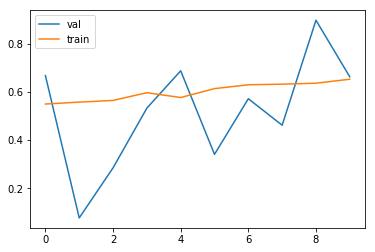

In [129]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Question 3

In [130]:
import statistics

statistics.median(hist['accuracy'])

0.6055000126361847

**0.56**

## Question 4

In [131]:
statistics.stdev(hist['loss'])

0.02193285159886279

**0.01**

In [132]:
input_size=150

train_gen = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

train_ds = train_gen.flow_from_directory(
    './dogs-and-cats-dataset/train',
    target_size=(input_size, input_size),
    class_mode='binary',
    batch_size=20
)


val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    './dogs-and-cats-dataset/validation',
    target_size=(input_size, input_size),
    class_mode='binary',
    batch_size=20,
    shuffle=False
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [133]:
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 35s 346ms/step - loss: 0.6638 - accuracy: 0.6000 - val_loss: 0.5903 - val_accuracy: 0.7620
Epoch 2/10
100/100 [==============================] - 34s 340ms/step - loss: 0.6521 - accuracy: 0.6035 - val_loss: 0.6714 - val_accuracy: 0.6180
Epoch 3/10
100/100 [==============================] - 38s 379ms/step - loss: 0.6528 - accuracy: 0.6315 - val_loss: 0.7065 - val_accuracy: 0.5350
Epoch 4/10
100/100 [==============================] - 36s 361ms/step - loss: 0.6526 - accuracy: 0.6130 - val_loss: 0.5973 - val_accuracy: 0.7410
Epoch 5/10
100/100 [==============================] - 36s 357ms/step - loss: 0.6418 - accuracy: 0.6385 - val_loss: 0.5279 - val_accuracy: 0.8230
Epoch 6/10
100/100 [==============================] - 36s 364ms/step - loss: 0.6383 - accuracy: 0.6435 - val_loss: 0.8080 - val_accuracy: 0.4280
Epoch 7/10
100/100 [==============================] - 34s 341ms/step - loss: 0.6398 - accuracy: 0.6220 - val_loss: 0.6223 - val_ac

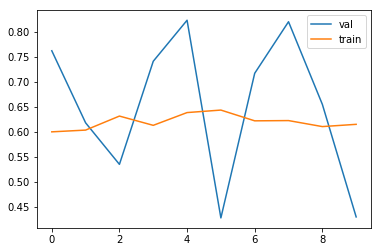

In [134]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Question 5

In [135]:
statistics.mean(hist['val_loss'])

0.6518030643463135

**0.67**

## Question 6

In [136]:
def Average(lst):
    return sum(lst) / len(lst)

Average(hist['val_accuracy'][5:10])

0.6099999964237213

**0.65**